In [1]:
import numpy as np
import cv2 as cv2
import tensorflow as tf

from tqdm import tqdm
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
width = 128
num_class = 2

trainpath = '2Train11/'
testpath = '2Test11/'


trainImg = [trainpath + f for f in os.listdir(trainpath)]
testImg = [testpath + f for f in os.listdir(testpath)]

In [8]:
def img2data(path):
  rawImg = []
  label =[]
  for imagePath in (path):
    print(imagePath)
    for item in tqdm(os.listdir(imagePath)):

      file = os.path.join(imagePath, item)

      #l = imagePath.split('/')[1 ]
      #if l == '11Ok':
      #  label.append([1,0])
      #elif l == '11Bad':
      #  label.append([0,1])

      img = cv2.imread(file, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (width,width))
      rawImg.append(img)

  return rawImg, label

In [9]:
xtrain, ytrain = img2data(trainImg)

2Train11/11Bad


100%|██████████| 139/139 [00:25<00:00,  5.38it/s]


2Train11/11Ok


100%|██████████| 215/215 [00:38<00:00,  5.55it/s]


In [43]:
xtrain, ytrain = img2data(trainImg)
xtest, ytest = img2data(testImg)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

100%|██████████| 20/20 [00:03<00:00,  5.90it/s]


In [44]:
model1 = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(width,width,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dense(16),
    keras.layers.Flatten(),
    keras.layers.Dense(num_class, activation='softmax')
])

model1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 32
epochs = 10

In [45]:
#train
history = model1.fit(xtrain,ytrain,batch_size = batch_size, epochs = epochs, validation_data=(xtest,ytest))

Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 0.6690 - accuracy: 0.6130 - val_loss: 0.6822 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.6376 - accuracy: 0.6102 - val_loss: 0.7564 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 0.6024 - accuracy: 0.6356 - val_loss: 0.7879 - val_accuracy: 0.5000
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 0.5718 - accuracy: 0.6977 - val_loss: 0.5901 - val_accuracy: 0.6750
Epoch 5/10
12/12 [==============================] - 16s 1s/step - loss: 0.5020 - accuracy: 0.8136 - val_loss: 0.6921 - val_accuracy: 0.5250
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 0.4361 - accuracy: 0.8446 - val_loss: 0.4670 - val_accuracy: 0.7750
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 0.3542 - accuracy: 0.9096 - val_loss: 0.5494 - val_accuracy: 0.5750
Epoch 8/10
12/12 [==

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 168ms/step
[[0.20896286 0.79103714]]
IMG_1828.JPG
Bad


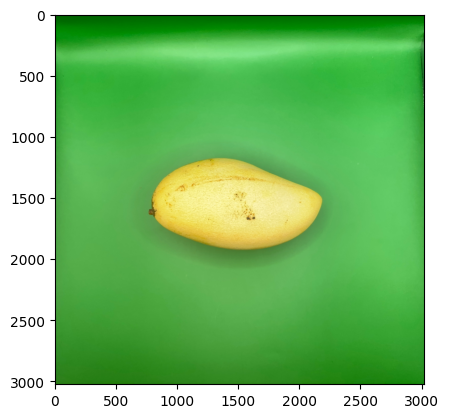

1/1 [==============================] - 0s 34ms/step
[[0.22868933 0.7713106 ]]
IMG_1834.JPG
Bad


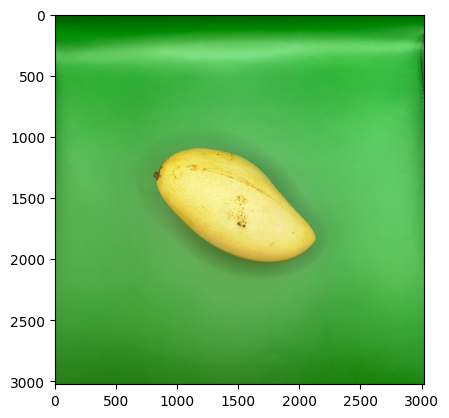

1/1 [==============================] - 0s 34ms/step
[[0.17750435 0.8224956 ]]
IMG_1839.JPG
Bad


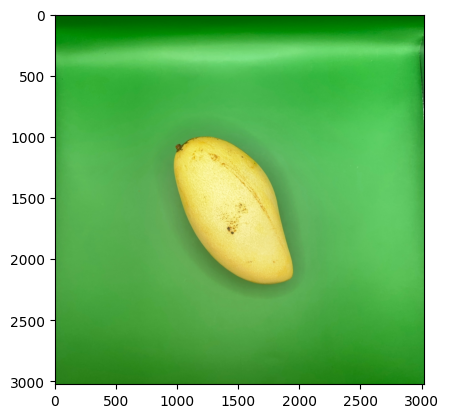

1/1 [==============================] - 0s 37ms/step
[[0.18107538 0.81892455]]
IMG_1841.JPG
Bad


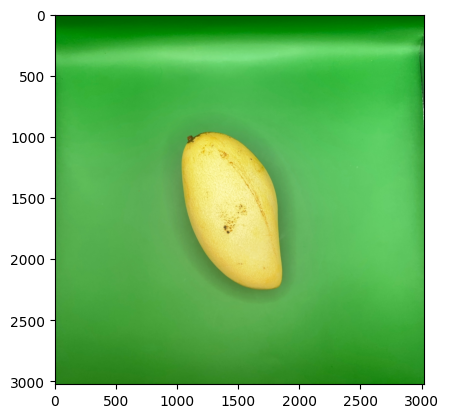

1/1 [==============================] - 0s 37ms/step
[[0.17247118 0.8275288 ]]
IMG_1842.JPG
Bad


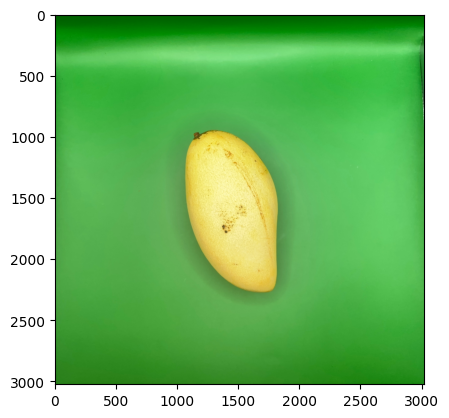

1/1 [==============================] - 0s 38ms/step
[[0.13953651 0.8604635 ]]
IMG_1848.JPG
Bad


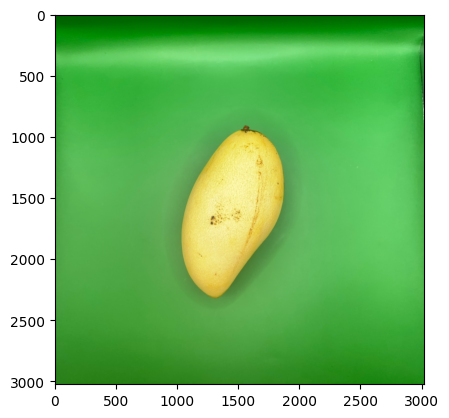

1/1 [==============================] - 0s 34ms/step
[[0.10866304 0.89133704]]
IMG_1855.JPG
Bad


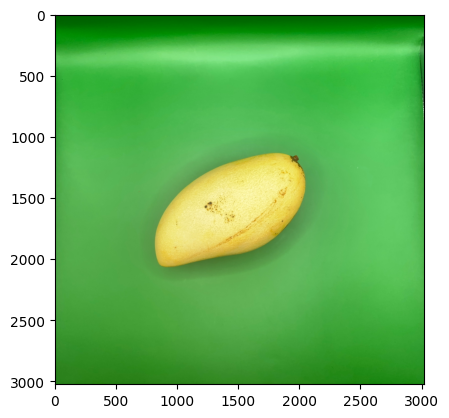

1/1 [==============================] - 0s 36ms/step
[[0.08605246 0.9139475 ]]
IMG_1859.JPG
Bad


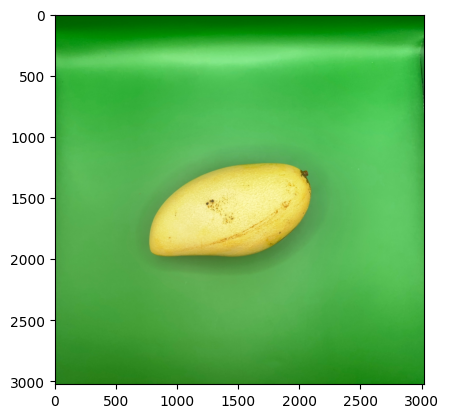

1/1 [==============================] - 0s 36ms/step
[[0.06687588 0.93312407]]
IMG_1863.JPG
Bad


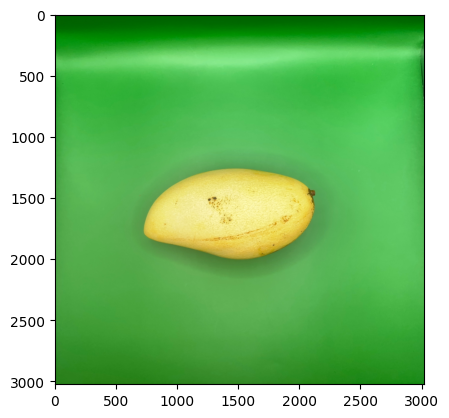

1/1 [==============================] - 0s 40ms/step
[[0.08139859 0.9186014 ]]
IMG_1870.JPG
Bad


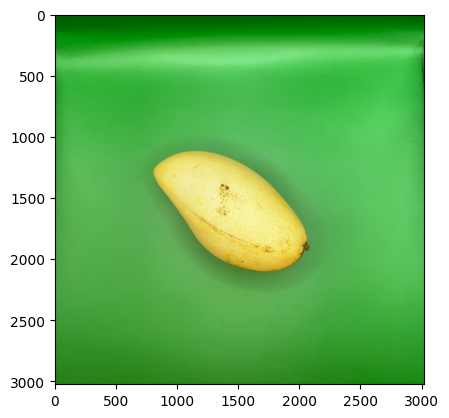

1/1 [==============================] - 0s 32ms/step
[[0.15400726 0.84599274]]
IMG_1880.JPG
Bad


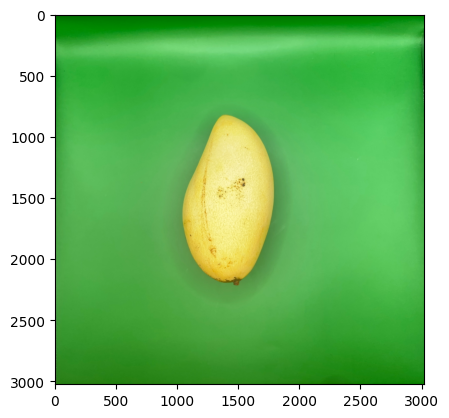

1/1 [==============================] - 0s 39ms/step
[[0.0457563 0.9542438]]
IMG_1888.JPG
Bad


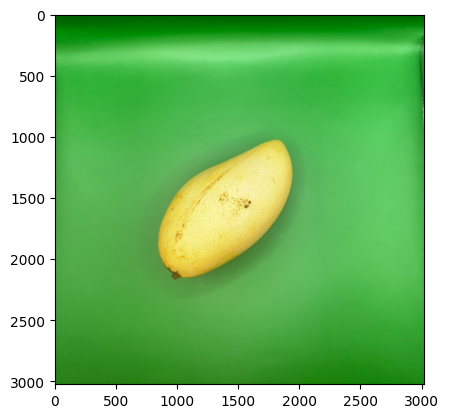

1/1 [==============================] - 0s 34ms/step
[[0.04885269 0.9511474 ]]
IMG_1891.JPG
Bad


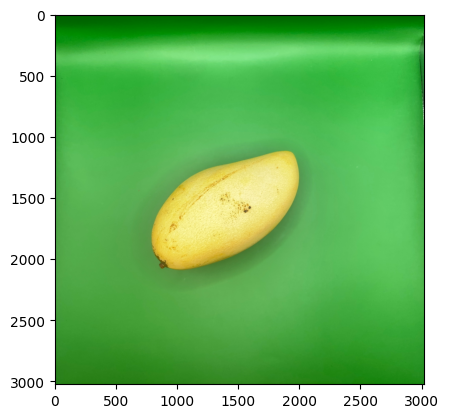

1/1 [==============================] - 0s 34ms/step
[[0.19261058 0.8073894 ]]
IMG_2117.JPG
Bad


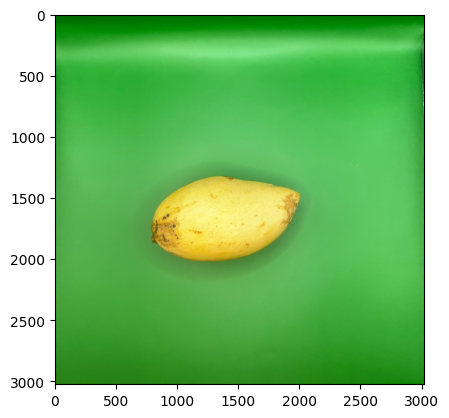

1/1 [==============================] - 0s 35ms/step
[[0.10933314 0.8906669 ]]
IMG_2118.JPG
Bad


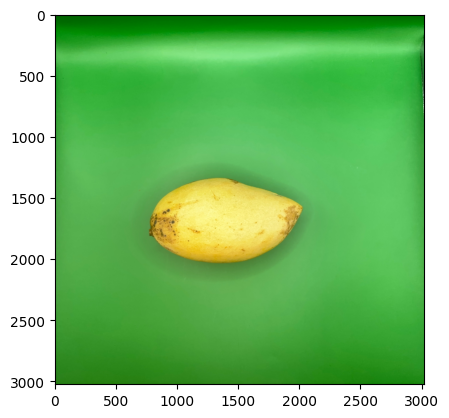

1/1 [==============================] - 0s 34ms/step
[[0.11945816 0.88054186]]
IMG_2125.JPG
Bad


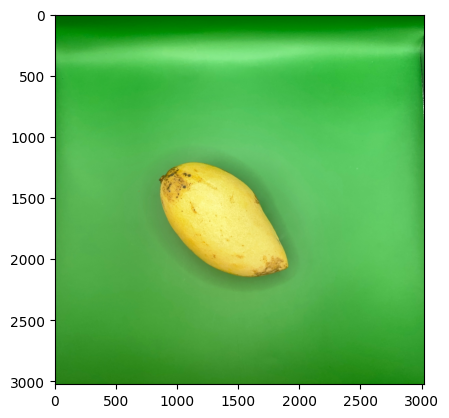

1/1 [==============================] - 0s 39ms/step
[[0.24737145 0.75262856]]
IMG_2142.JPG
Bad


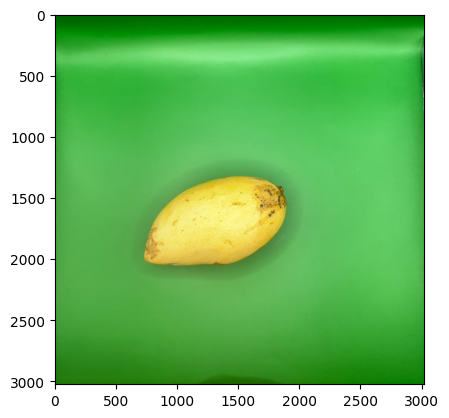

1/1 [==============================] - 0s 40ms/step
[[0.04470235 0.95529765]]
IMG_2155.JPG
Bad


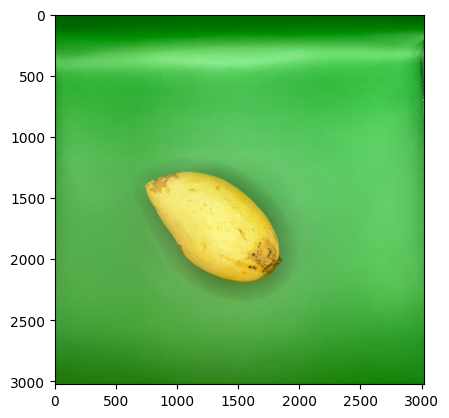

1/1 [==============================] - 0s 36ms/step
[[0.03143083 0.96856916]]
IMG_2157.JPG
Bad


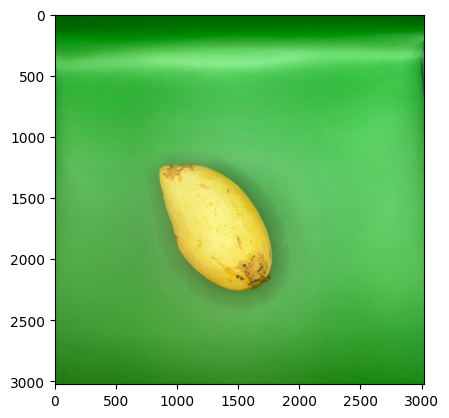

1/1 [==============================] - 0s 36ms/step
[[0.00956218 0.9904378 ]]
IMG_2177.JPG
Bad


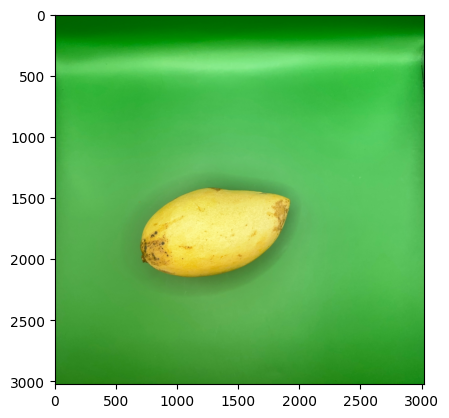

1/1 [==============================] - 0s 48ms/step
[[0.84679914 0.15320088]]
Ok (10).JPG
Ok


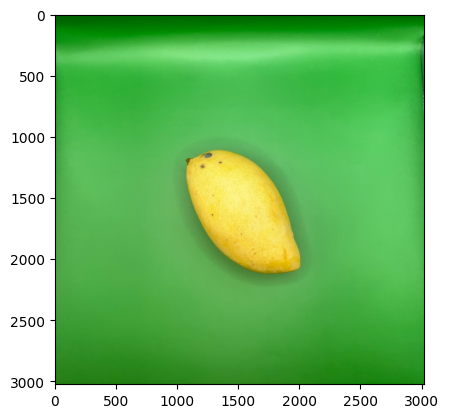

1/1 [==============================] - 0s 42ms/step
[[0.8521664  0.14783359]]
Ok (12).JPG
Ok


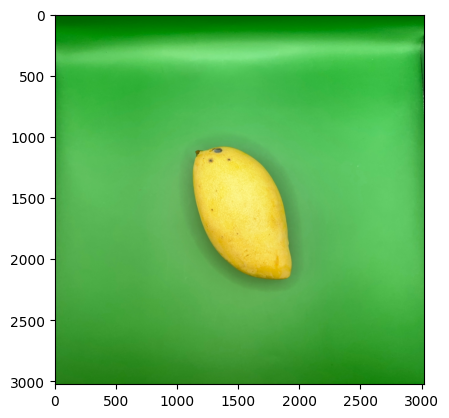

1/1 [==============================] - 0s 42ms/step
[[0.8405519  0.15944807]]
Ok (13).JPG
Ok


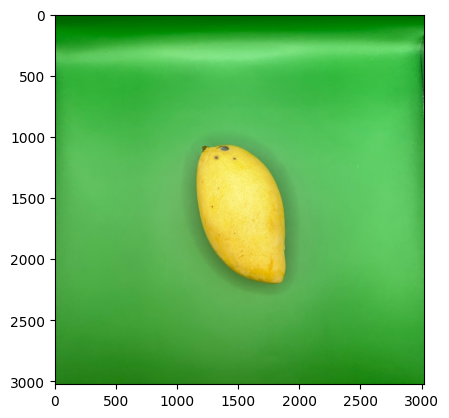

1/1 [==============================] - 0s 43ms/step
[[0.794611   0.20538902]]
Ok (14).JPG
Ok


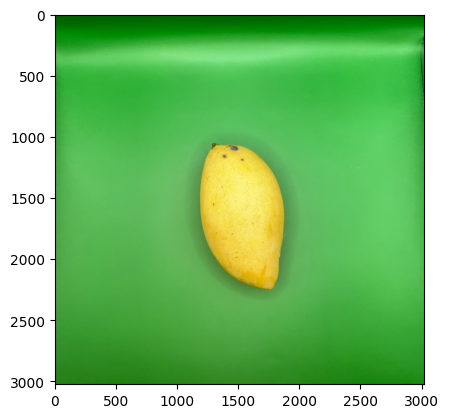

1/1 [==============================] - 0s 40ms/step
[[0.7860506  0.21394938]]
Ok (15).JPG
Ok


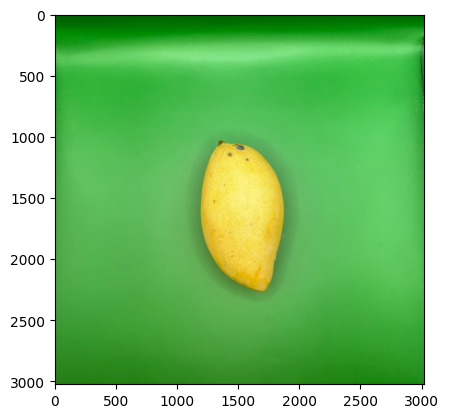

1/1 [==============================] - 0s 50ms/step
[[0.7678528  0.23214722]]
Ok (16).JPG
Ok


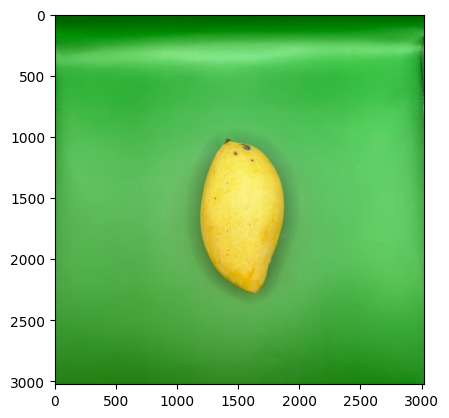

1/1 [==============================] - 0s 47ms/step
[[0.74491614 0.2550839 ]]
Ok (17).JPG
Ok


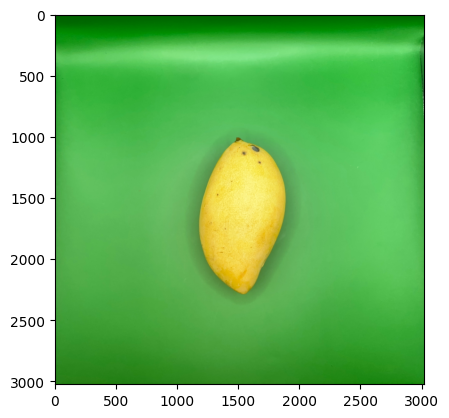

1/1 [==============================] - 0s 35ms/step
[[0.735505   0.26449502]]
Ok (18).JPG
Ok


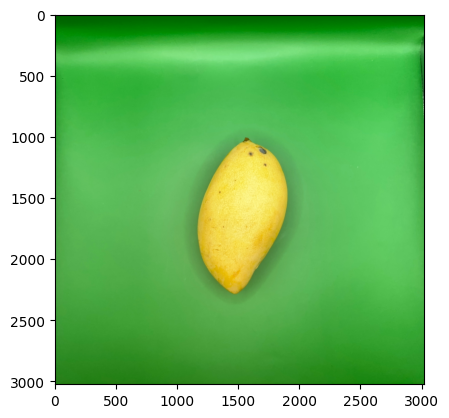

1/1 [==============================] - 0s 47ms/step
[[0.7220803  0.27791974]]
Ok (19).JPG
Ok


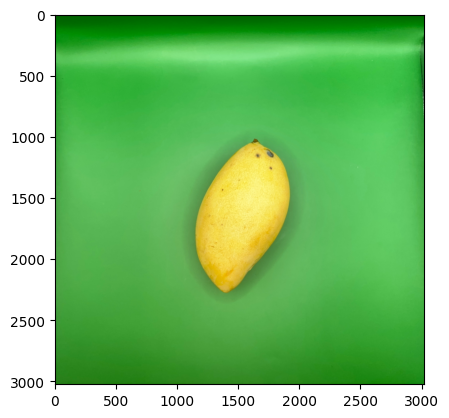

1/1 [==============================] - 0s 56ms/step
[[0.71912235 0.2808777 ]]
Ok (20).JPG
Ok


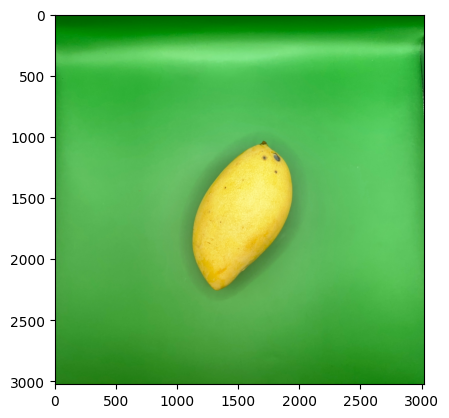

1/1 [==============================] - 0s 37ms/step
[[0.7116927  0.28830725]]
Ok (21).JPG
Ok


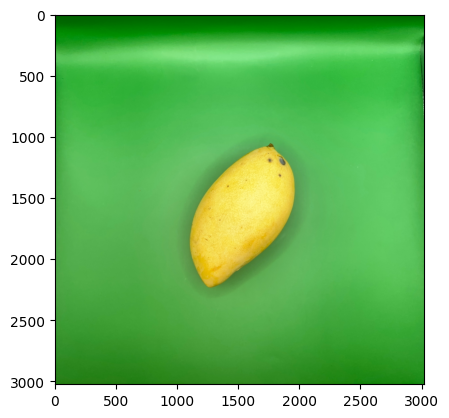

1/1 [==============================] - 0s 34ms/step
[[0.71949 0.28051]]
Ok (22).JPG
Ok


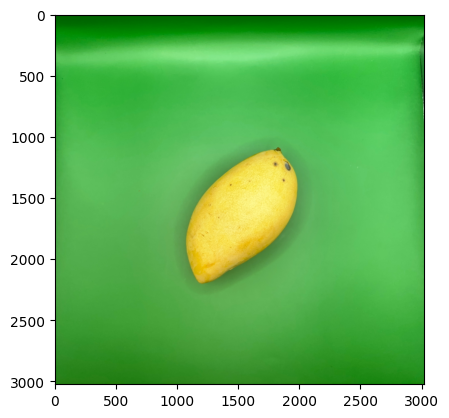

1/1 [==============================] - 0s 36ms/step
[[0.7102363  0.28976372]]
Ok (23).JPG
Ok


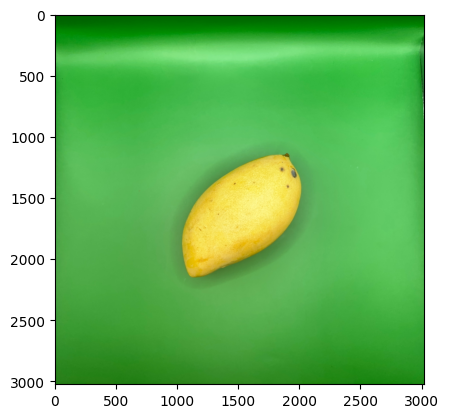

1/1 [==============================] - 0s 38ms/step
[[0.72033376 0.27966622]]
Ok (24).JPG
Ok


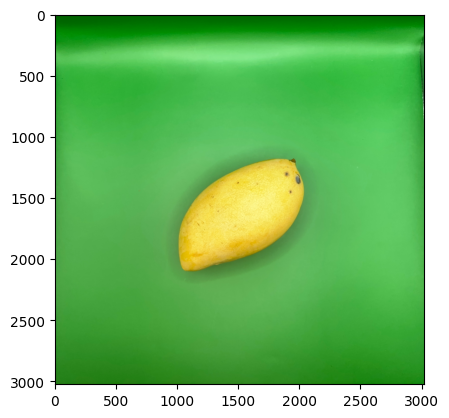

1/1 [==============================] - 0s 54ms/step
[[0.71820843 0.28179154]]
Ok (25).JPG
Ok


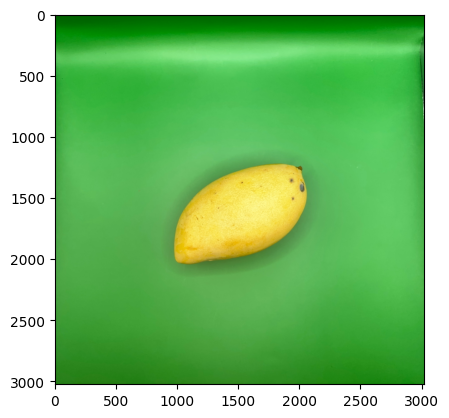

1/1 [==============================] - 0s 38ms/step
[[0.73624045 0.26375952]]
Ok (26).JPG
Ok


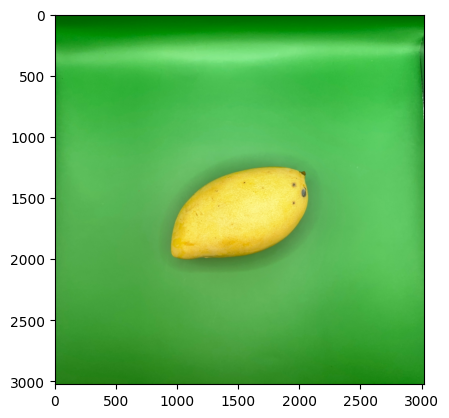

1/1 [==============================] - 0s 40ms/step
[[0.7446457  0.25535434]]
Ok (27).JPG
Ok


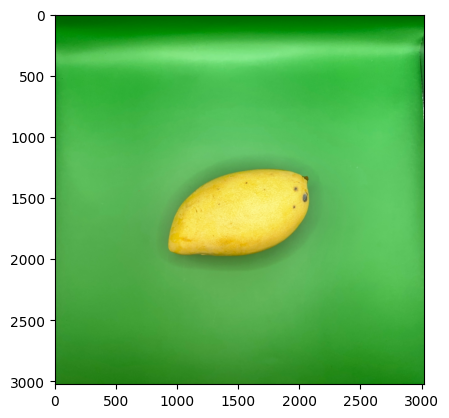

1/1 [==============================] - 0s 37ms/step
[[0.7474648  0.25253525]]
Ok (28).JPG
Ok


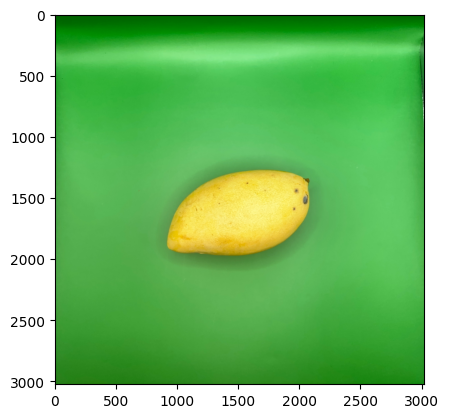

1/1 [==============================] - 0s 36ms/step
[[0.876584   0.12341604]]
Ok (4).JPG
Ok


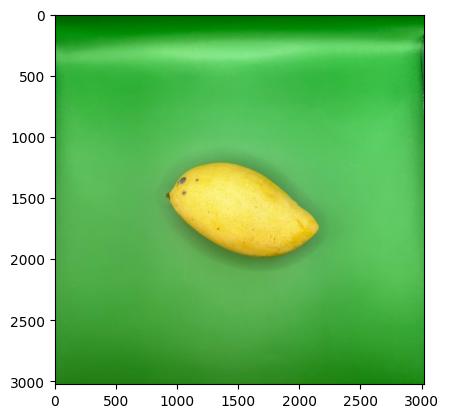

1/1 [==============================] - 0s 36ms/step
[[0.85772413 0.14227585]]
Ok (7).JPG
Ok


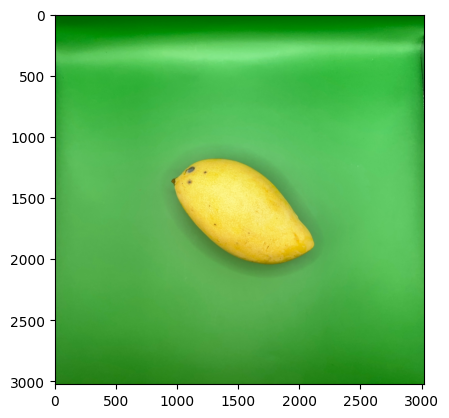

In [48]:
testPath = '2Test11/'

testimg = [testPath +f for f in os.listdir(testPath)]
rimg = []

for imgPath in (testimg):
  for item in (os.listdir(imgPath)):
    file = os.path.join(imgPath, item)
    if item.split('.')[0] != "":
      
      img = cv2.imread(file, cv2.COLOR_BGR2RGB)
      ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (width,width))
      rimg = np.array(img)
      rimg = rimg.astype('float32')
      rimg /= 255
      rimg = np.reshape(rimg, (1,128,128,3))
      predict = model1.predict(rimg)
      label = ['Ok','Bad']
      result = label[np.argmax(predict)]

      print(predict)
      print(str(item))
      print(str(result))
      plt.imshow(ori)
      plt.show()